## **CUSTOMER TELCO CHURN ANALYSIS PROJECT**

##### **Problem Statement**
Customer retention is at the heart of most business models in their effort to increase their profit or revenue margin. Presently, most companies leverage machine learning to build classification models to perform churn analysis on their customers. The highly competitive nature of the telecommunications industry makes retaining customers extremely crucial. This project involves accessing and analyzing customer churn data from multiple sources, building a robust classification model, and helping a telecommunication company predict customer churn to improve retention strategies. The objective is to help a telecommunication company understand customer churn and its impact on profitability. 

##### **Goal and Objectives**

•    To understand the current customer churn rate.

•    To identify factors (such as demographics, usage patterns, etc.) that influence customer churn aiming to gain a deeper understanding of customer behavior

•    To build a predictive machine learning model to predict customer churn for a telecommunications company to forecast which customers are likely to churn

##### **Stakeholders**
•	Company Executives and Management

•	Data Science and Analytics Team

•	Customer Service and Support Teams

•	Marketing and Sales and Advertisement Teams:

•	Finance 

•	Legal and Compliance Team

##### **Key Metrics and Success Criteria**

•  Accuracy Requirement:

•	This model must achieve an accuracy score of at least 85% when evaluated on balanced data, ensuring a high proportion of correct predictions.
•  F1 Score Benchmark

•	Models should attain an F1 score greater than 0.80 (80%), indicating a strong balance between precision and recall, which is crucial for handling both false positives and false negatives effectively.

•  ROC Curve Standard:

•	An ROC curve with an area under the curve (AUC) of 80% is desired, demonstrating the model's ability to generalize well and maintain a good balance between sensitivity and specificity.

•  Baseline Models Requirement:

•	At least four different baseline models should be developed to serve as benchmarks. These could include logistic regression, decision trees, support vector machines, and k-nearest neighbors, providing a range of reference points for comparison.

•  Hyperparameter Tuning Condition:

Hyperparameter tuning will be conducted only on those baseline models that achieve an F1 score above the 0.80 threshold. This ensures that tuning efforts are concentrated on models that show initial promise and meet the performance criteria.


##### **Hypothesis**

•  Null Hypothesis (Ho): There is a significant difference in churn rates between customers who have received promotional offers and those who have not.

 •Alternate Hypothesis (Ha) : Customers who have not received any promotional offers in the past year have a higher churn rate.

     




##### **Analytical Questions**
I.	What are the key demographic and behavioral characteristics of customers who churn compared to those who stay?

Insights derrived can include whether certain age groups or regions are more prone to churn, or if specific behaviors (like low usage or frequent complaints) correlate with higher churn rates. 

II.	Is there a relationship between the payment methods used by customers and their likelihood to churn?

Insights include identifying the payment methods used by customers and their likelihood to churn.

III. Which factors have the highest influence on customer churn, and how do they interact with each other?

Insights include identifying the most important factors like service quality, pricing competitiveness that contribute to churn, and how they interact with each other.

IV.	Is there a relationship between the payment methods chosen by customers and their likelihood to churn?

Insights include understanding the impact of economic conditions, competitor actions, and market trends on customer churn rates.

V.	What is the overall churn rate compared across different contract types?

Insights include understanding the overall churn rate across different contract types.


##### **Scope and Constraints**
Some constraints of this project include, computational resources, model complexity, time limitations, stakeholder expectations, and ethical and legal considerations.

##### **Additional Information**

This project is to be completed in 4 weeks 

















### **Data Understanding**

In [2]:
 
 #Data manipulation and analysis
import pandas as pd
import numpy as np
 
# Database connectivity
import pyodbc
 
# Database ORM (optional)
from sqlalchemy import create_engine
 
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
 
# Machine learning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
 


#### Data Loading

In [3]:
#Connecting to the first database
# Now the sql query to get the data is what what you see below.
# Define the connection string
server = 'dap-projects-database.database.windows.net'
database = 'dapDB'
username = 'LP2_project'
password = 'Stat$AndD@t@Rul3'
conn_str = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Connect to the database
conn = pyodbc.connect(conn_str)

# Query the data
query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"
data1 = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display the data
print(data1.head(1))

C:\Users\USER\AppData\Local\Temp\ipykernel_17512\2806874801.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data1 = pd.read_sql(query, conn)


   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female          False     True       False       1   

   PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0         False          None             DSL          False  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0            False       False       False           False  Month-to-month   

  PaperlessBilling     PaymentMethod MonthlyCharges  TotalCharges  Churn  
0             True  Electronic check          29.85         29.85  False  

[1 rows x 21 columns]


In [4]:
#Connecting to the second database

# URL of the CSV file
data2= "https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/main/LP2_Telco-churn-second-2000.csv"

# Load the dataframe from the URL
data2= pd.read_csv(data2)

# Display the first row to verify
print(data2.head(1))

   customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  5600-PDUJF   Male              0      No         No       6          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes          No              No  Month-to-month              Yes   

             PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Credit card (automatic)           49.5         312.7    No  

[1 rows x 21 columns]


In [5]:
#Connecting to the third database

# file path of the Excel file
file_path = r"C:\Users\USER\Desktop\Telco-churn-last-2000.xlsx"

# Load Excel file into a DataFrame
Test_data = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(Test_data.head(1))


   customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7613-LLQFO   Male              0      No         No      12          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0           Yes     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No         Yes              No  Month-to-month              Yes   

      PaymentMethod  MonthlyCharges TotalCharges  
0  Electronic check           84.45      1059.55  


#### **Exploratory Data Analysis (EDA)**

- Data Quality Assement ,EDA & Data Cleaning

In [6]:
#Checking basic information for the fistdata set 
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [7]:
#Checking basic information for the second data set 
data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [8]:
#Checking basic information for the third data set 

Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [9]:
#concatenating data1 and data2

train_data = pd.concat([data1, data2], axis = 0)
train_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
2042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [10]:
#Checking basic information for the train data set 

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [11]:
#viewing data columns of train dataset 

train_data.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
#Describe numerical train data set
train_data.describe().T




,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


In [13]:
#Describe categorical train data set

train_data.describe(include='object').T

,count,unique,top,freq
customerID,5043,5043,3186-AJIEK,1
gender,5043,2,Male,2559
Partner,5043,4,False,1538
Dependents,5043,4,False,2070
PhoneService,5043,4,True,2731
MultipleLines,4774,5,False,1437
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,5,False,1478
OnlineBackup,4392,5,False,1320
DeviceProtection,4392,5,False,1296


In [14]:
#Checking for duplicates in train data set

train_data.duplicated().sum()

np.int64(0)

In [15]:
#Checking for missing values in train data set 

train_data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [16]:
#Calculating the percentage of mising values in train data set 

train_data.isnull().sum()/len(train_data)*100

customerID           0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        5.334127
InternetService      0.000000
OnlineSecurity      12.908983
OnlineBackup        12.908983
DeviceProtection    12.908983
TechSupport         12.908983
StreamingTV         12.908983
StreamingMovies     12.908983
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.099147
Churn                0.019829
dtype: float64

In [17]:
#standardizing values in train data set 
def standardize_value(value):
    if value is True or value == 'Yes':
        return 'Yes'
    elif value is False or value == 'No' or value == 'None':
        return 'No'
    elif value == 'No internet service' or value == 'No phone service':
        return value 
    else:
        return 'Unknown'

# List of columns to be standardized
columns_to_standardize = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn'
]

# Apply standardization to each column in the list
for column in columns_to_standardize:
    train_data[column] = train_data[column].apply(standardize_value)

# Confirm changes in merged data set
for column in columns_to_standardize:
    unique_values_after = train_data[column].unique()
    print(f'Unique values in {column} after standardization: {unique_values_after}')
    print (train_data[column].value_counts())
    print()

Unique values in Partner after standardization: ['Yes' 'No']
Partner
No     2585
Yes    2458
Name: count, dtype: int64

Unique values in Dependents after standardization: ['No' 'Yes']
Dependents
No     3482
Yes    1561
Name: count, dtype: int64

Unique values in PhoneService after standardization: ['No' 'Yes']
PhoneService
Yes    4554
No      489
Name: count, dtype: int64

Unique values in MultipleLines after standardization: ['Unknown' 'No' 'Yes' 'No phone service']
MultipleLines
No                  2424
Yes                 2130
Unknown              269
No phone service     220
Name: count, dtype: int64

Unique values in OnlineSecurity after standardization: ['No' 'Yes' 'Unknown' 'No internet service']
OnlineSecurity
No                     2507
Yes                    1456
Unknown                 651
No internet service     429
Name: count, dtype: int64

Unique values in OnlineBackup after standardization: ['Yes' 'No' 'Unknown' 'No internet service']
OnlineBackup
No                    

In [18]:
#Change total charges to numeric i.e. form obj to float

train_data['TotalCharges'] = pd.to_numeric(train_data['TotalCharges'], errors='coerce')
train_data['TotalCharges'] = train_data['TotalCharges'].astype(float)
train_data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,Unknown,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [19]:
#checking for unique values in train data set

train_data.nunique()

customerID          5043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          4
InternetService        3
OnlineSecurity         4
OnlineBackup           4
DeviceProtection       4
TechSupport            4
StreamingTV            4
StreamingMovies        4
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      2069
TotalCharges        4863
Churn                  3
dtype: int64

In [20]:
#Check for null values in train data set
train_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [21]:
#Filling missing values in merged data set (Total Charges)

train_data['TotalCharges'] = train_data['TotalCharges'].fillna(train_data['TotalCharges'].mean())

#Check for null values in train data set

train_data.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
#descbribe train data set only showing the numerical variables

train_data.describe().T



,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775,70.550003,90.050003,118.650002
TotalCharges,5043.0,2302.062861,2267.682399,18.799999,418.000,1406.000000,3857.575073,8670.100000


- 

In [23]:
#describe train data set only showing the categorical variables
train_data.describe(include='object').T

,count,unique,top,freq
customerID,5043,5043,3186-AJIEK,1
gender,5043,2,Male,2559
Partner,5043,2,No,2585
Dependents,5043,2,No,3482
PhoneService,5043,2,Yes,4554
MultipleLines,5043,4,No,2424
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,5043,4,No,2507
OnlineBackup,5043,4,No,2231
DeviceProtection,5043,4,No,2219


#### Key Insights and Observations
- The data for this telco customer prediction analysis are 3 sets of data derrived from different sources. The first dataset (data1) had 21 columns and 3000 row and the second dataset (data2) had 21 columns and 2043 rows. The last set is known as Test data would be used later in module build. The first 2 datasets were merged to create a new dataset (train_data) with 21 columns and 5043 rows

- Categorical values from the train_data are: customerID, gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Churn

- Numerical values from the train_data are: SeniorCitizen, tenure, MonthlyCharges, TotalCharges

- After merger it was noticed these columns had null values: MultipleLines: 269 null values, OnlineSecurity: 651 null values, OnlineBackup: 651 null values, DeviceProtection: 651 null values, TechSupport: 651 null values, StreamingTV: 651 null values, StreamingMovies: 651, null values, TotalCharges: 5 null values, Churn: 1 null value. 

- Columns were standardized in above function which helped with missing values in all columns except TotalCharges column..

- The TotalCharges column had 8 null values which were filled with the mean of the column and column was changed from object type to float type.

- The SeniorCitizen column indicated binary variables indicationg 1 as senior citizen or not as 0. The mean value of approximately 0.162 indicates that 16.2% of the customers are senior citizens.. The standard deviation of 0.354 indicates that the data is not normally distributed. The quatiles (25%, 50% and 75%) are 0 which shows most of the telco'c customers are not senior citizens.

- The tenure column indicated the number of months the customer has been with the company. The mean value of approximately 32.5 months indicates that the average tenure is 29.8 months. The standard deviation of 24.5 months indicates that the data is not normally distributed. The median value of 29.8 months indicates that 50% of the customers have been with the company for less than 29 months. Minimum tenure is 0 month and maximum tenure is 72 months.

- The MonthlyCharges column indicated the amount charged to the customer monthly. The mean value of approximately 65.09 indicates with a standard deviation of 30.01 indicates again, that the data is not normally distributed. The median monthly charge is $70.35. Minimum monthly charge is $18.4. The range spans from a minimum of $18.4 to a maximum of $118.8. Thisindicates that the data is skewed to the right.

- The TotalCharges column indicated the total amount charged to the customer. The mean value of approximately 2302.06 indicates with a standard deviation of 2267.6 indicates again, that the data is not normally distributed. The median total charge is 1406.0 Minimum total charge is $18.80. This range of values indicates that the data is skewed to the right.

**Univariate Analysis**


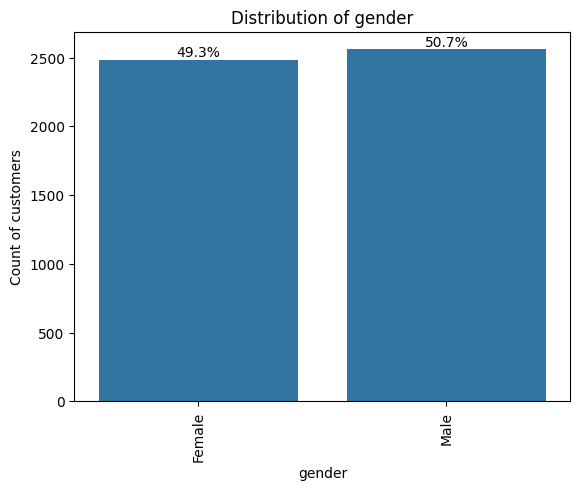

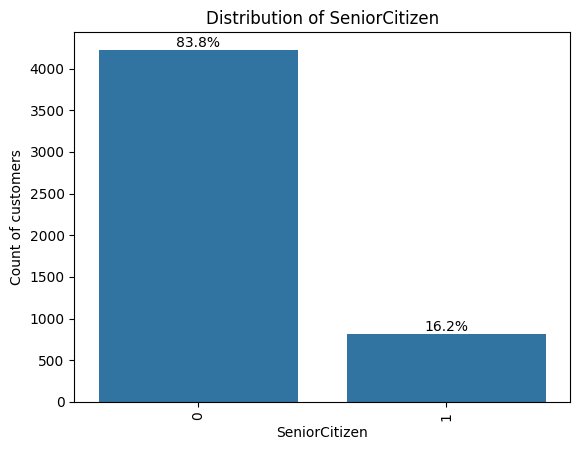

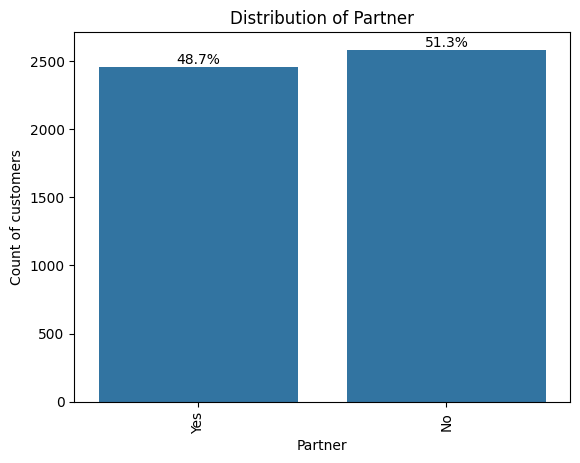

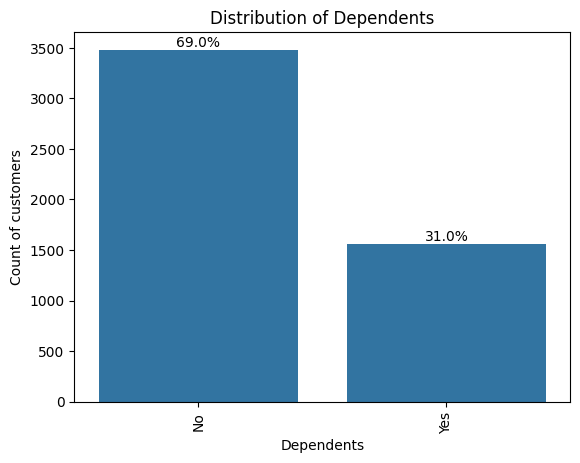

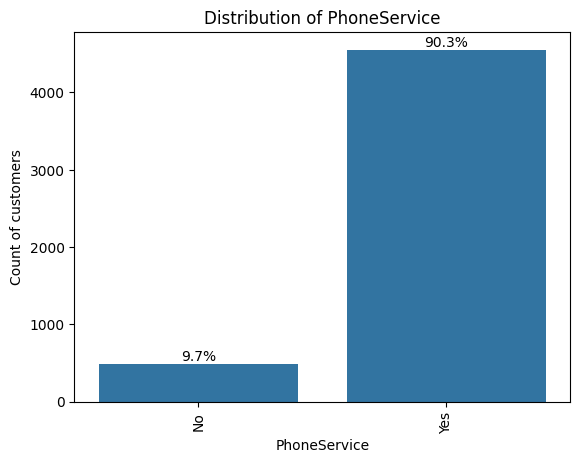

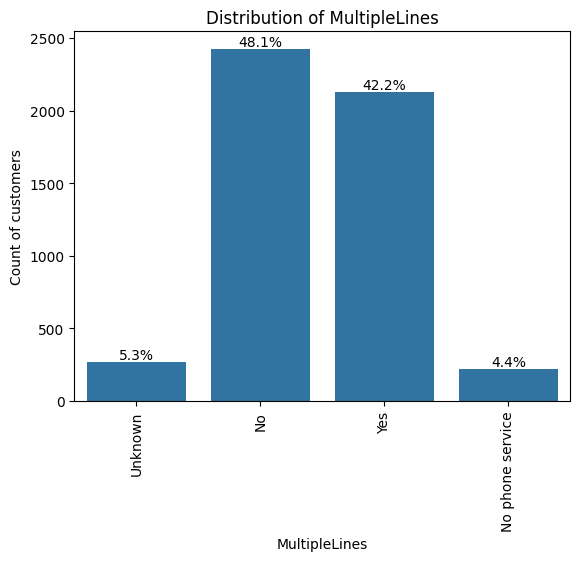

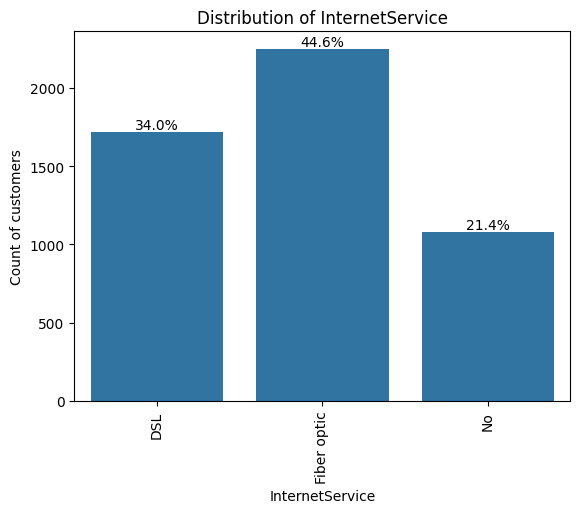

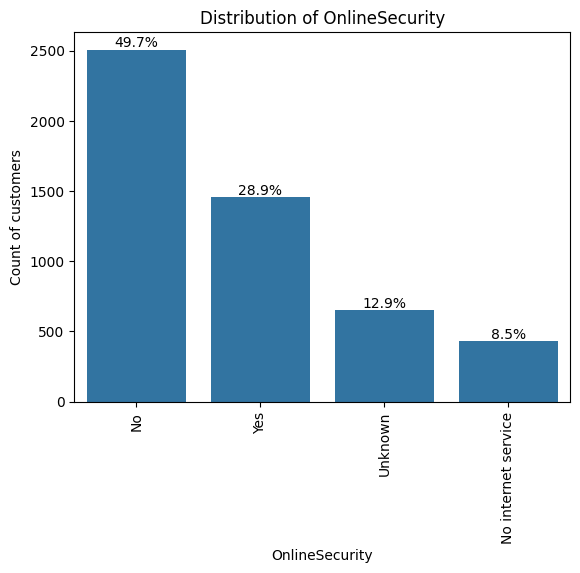

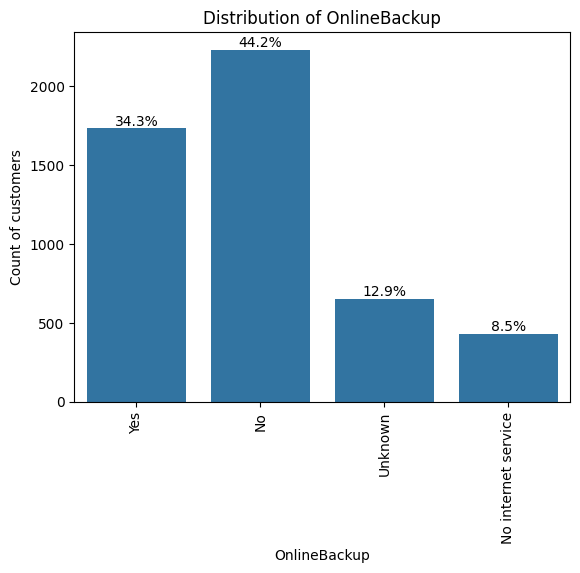

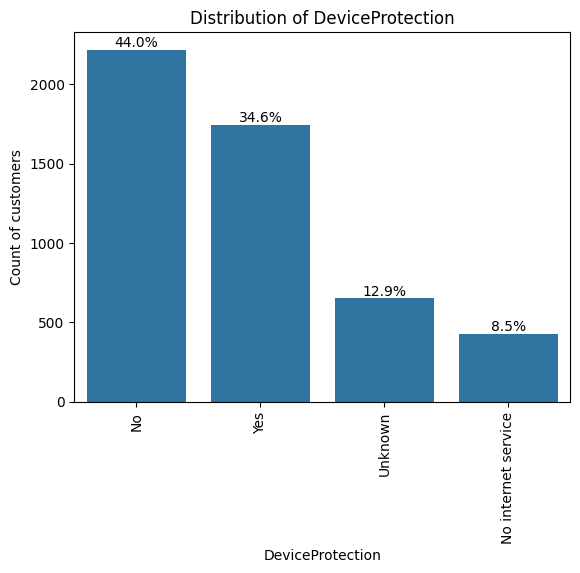

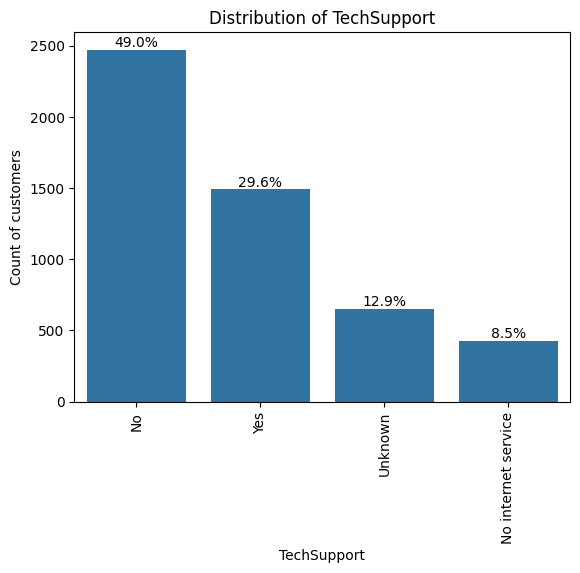

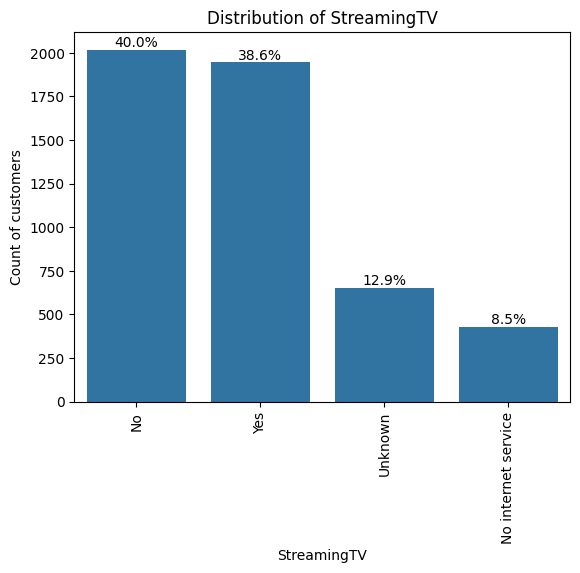

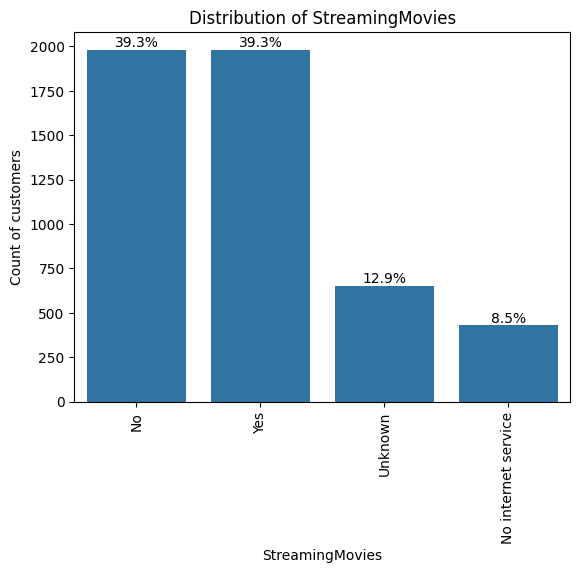

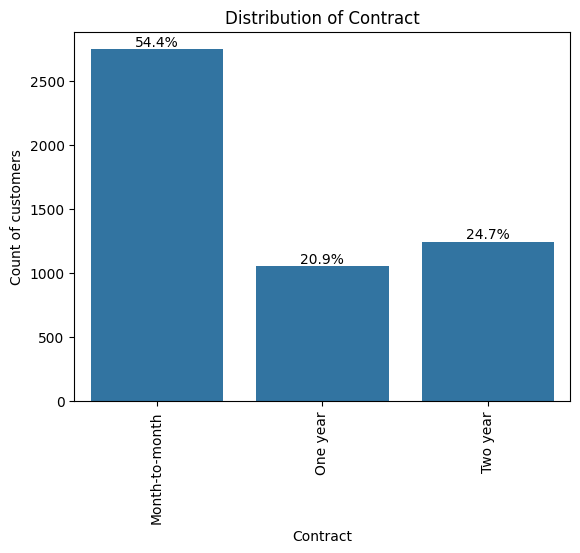

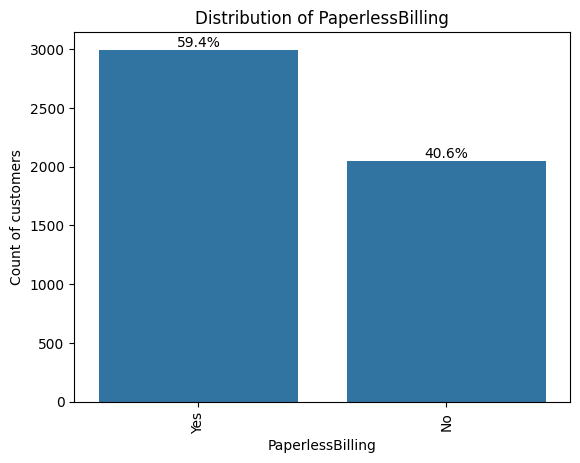

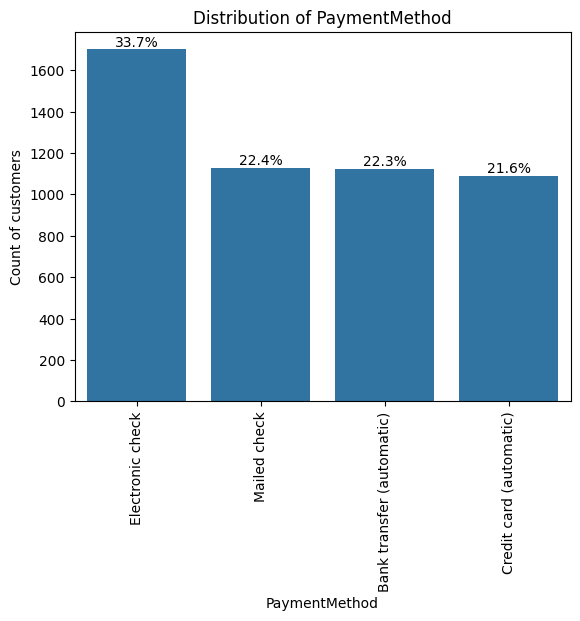

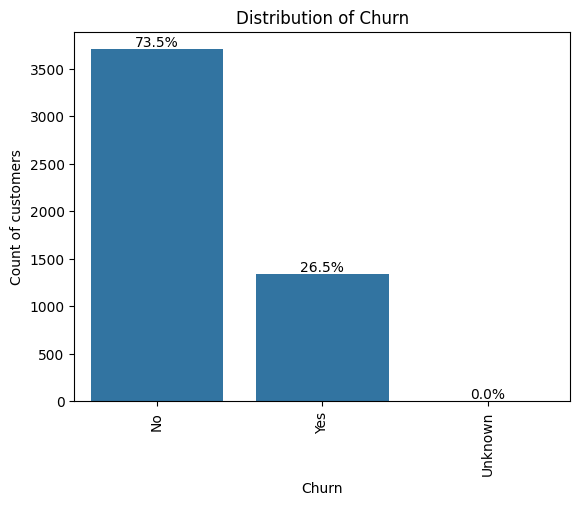

In [24]:
# Distribution of categorical variables in train data set
for i, predictor in enumerate(train_data.drop(columns=['TotalCharges', 'MonthlyCharges', 'customerID', 'tenure']).columns):
    plt.figure(i)
    ax = sns.countplot(data=train_data, x=predictor)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {predictor}')
    plt.xlabel(f'{predictor}')
    plt.ylabel('Count of customers')

    total = len(train_data)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        ax.annotate(percentage, 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')
    
    plt.show()


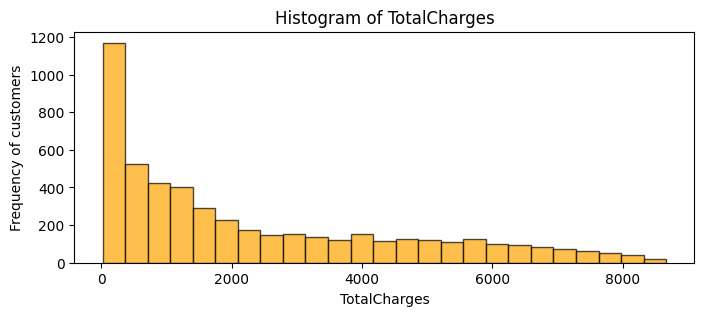

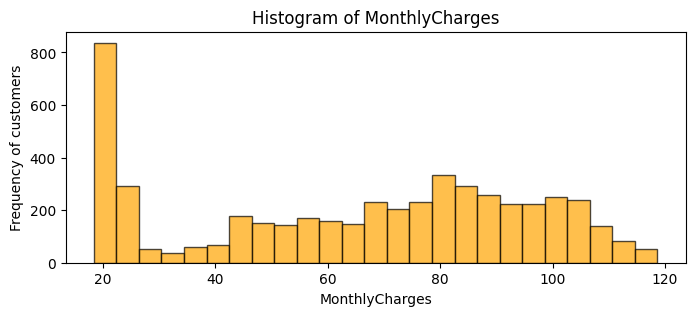

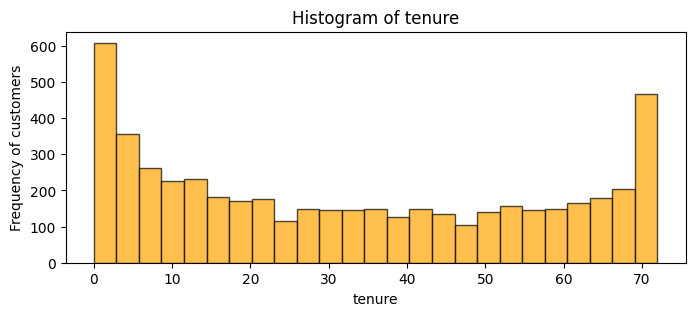

In [25]:
# List of numerical columns to plot histograms for
numerical_columns = ['TotalCharges', 'MonthlyCharges', 'tenure']

# Plot histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 3))  
    plt.hist(train_data[column], bins=25, edgecolor='black', alpha=0.7, color='orange')  # Changed color to orange
    plt.title(f'Histogram of {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency of customers')
    plt.grid(False)  # Removed grid lines
    plt.show()



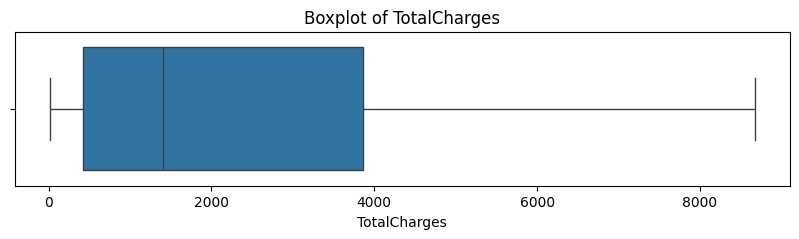

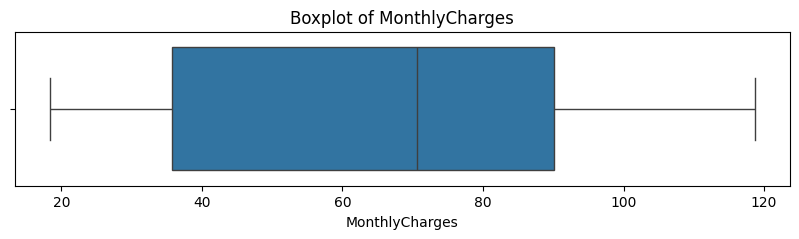

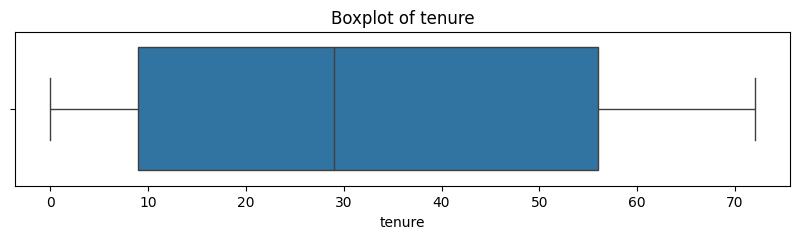

In [26]:
# checking for outleiers using boxplot

for column in numerical_columns:
    plt.figure(figsize=(10, 2))  
    sns.boxplot(x=train_data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(f'{column}')

#### Key Insights from the Univariate Analysis
- From the distribution of the categorical variables, we can see that most of the customers are not senior citizens
- From the ditribution it is indicated that there are more male customers than female customers.
- From the distribution majority of customers (73.5%) did not churn, while a significant portion (26.5%) did, and the "Unknown" category is negligible with a 0.0% churn rate. Management can focus on addressing the reasons behind the 26.56% this could help reduce churn and improve customer retention rate.
- A percentage of 33.7% indicates most of the customers prefer using electronic check as their payment method.
- Histogram of TotalCharges indicates that the data is skewed to the right.
- The tenure and MonthlyCharges data do not have significant outliers, indicating that most customers fall within a predictable range for these metrics.
- The TotalCharges data shows a wider range and spread, suggesting varying levels of total spending among customers.
- The median values indicate that half of the customers have been with the company for less than or equal to around 30 months, pay less than or equal to $70 per month, and have total charges less than or equal to $2000.




**Bivariate Analysis**

In [27]:
#correlation 

train_data.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.004597,0.221780,0.095198
tenure,0.004597,1.000000,0.240645,0.825106
MonthlyCharges,0.221780,0.240645,1.000000,0.646568
TotalCharges,0.095198,0.825106,0.646568,1.000000


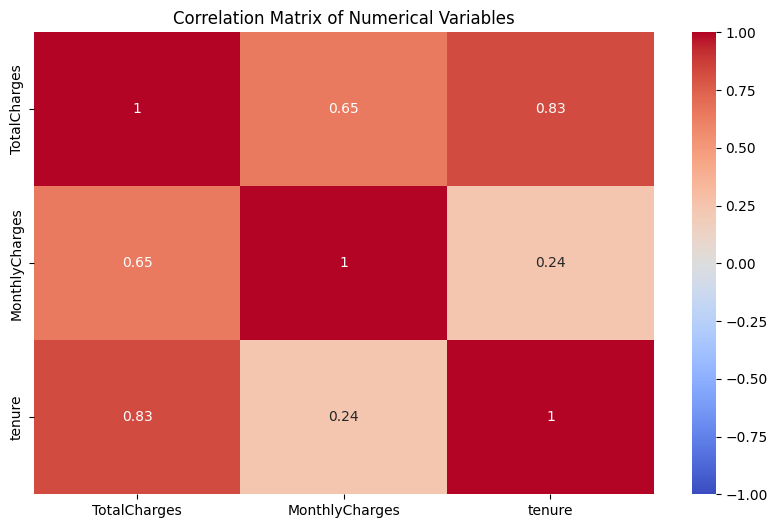

In [28]:
#visualization the correlation matrix

# Select numerical columns from the train_data
numerical_columns = ['TotalCharges', 'MonthlyCharges', 'tenure']

# Create a correlation matrix
correlation_matrix = train_data[numerical_columns].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

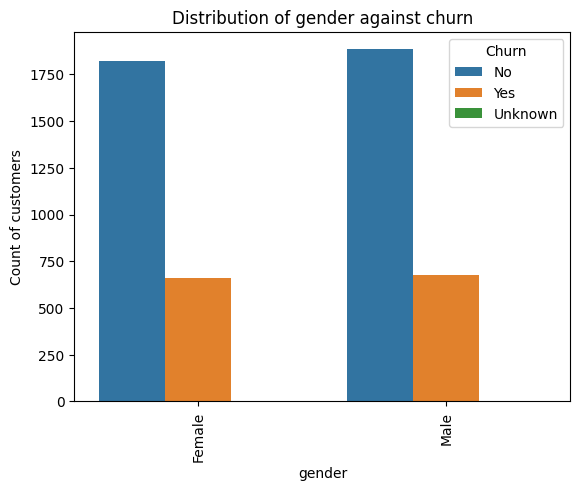

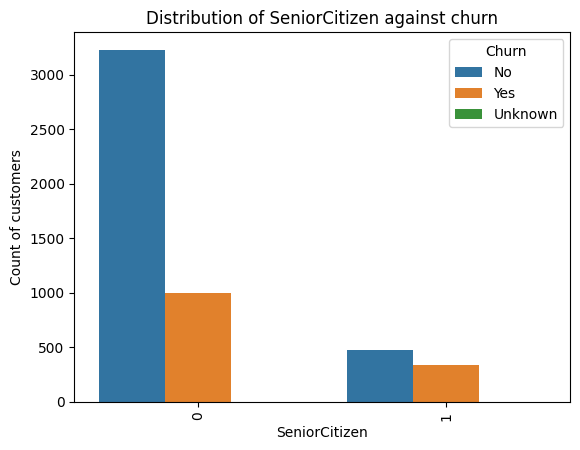

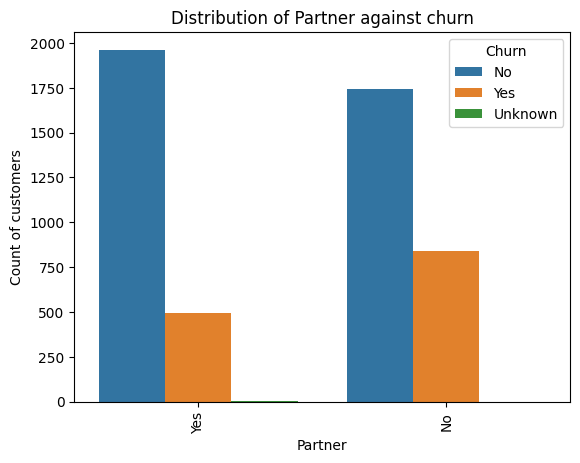

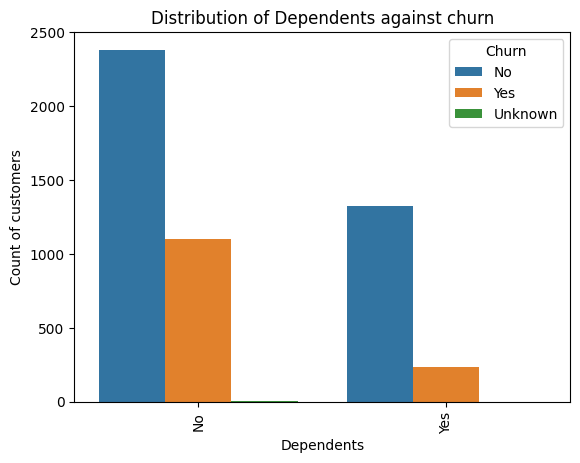

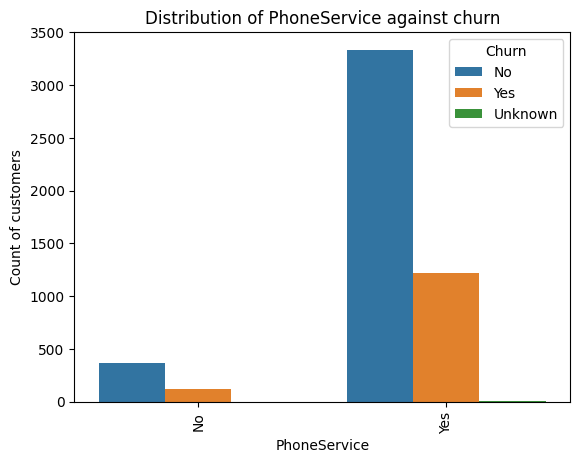

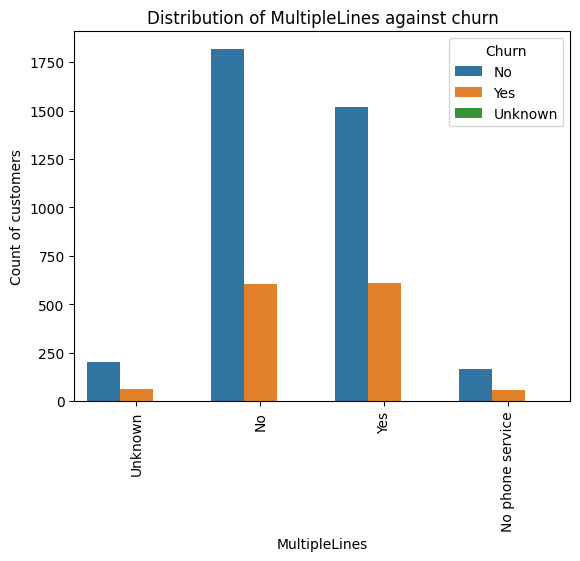

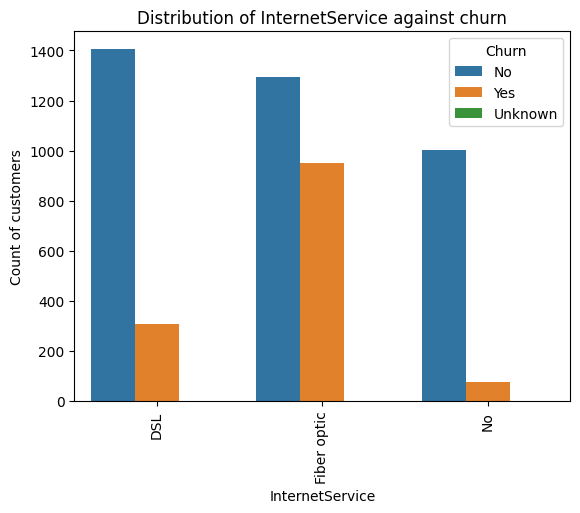

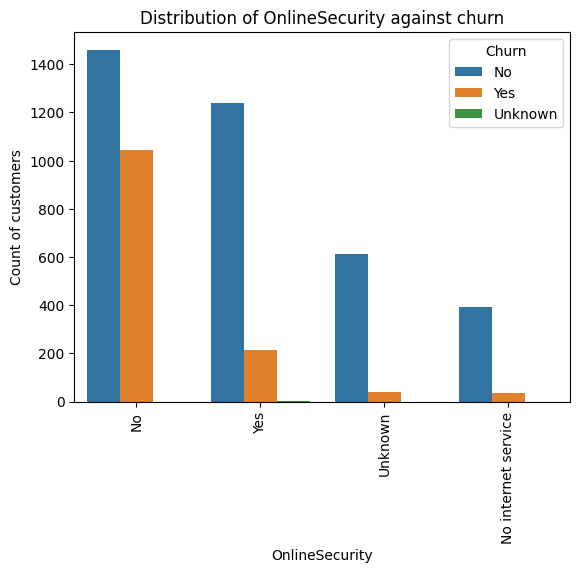

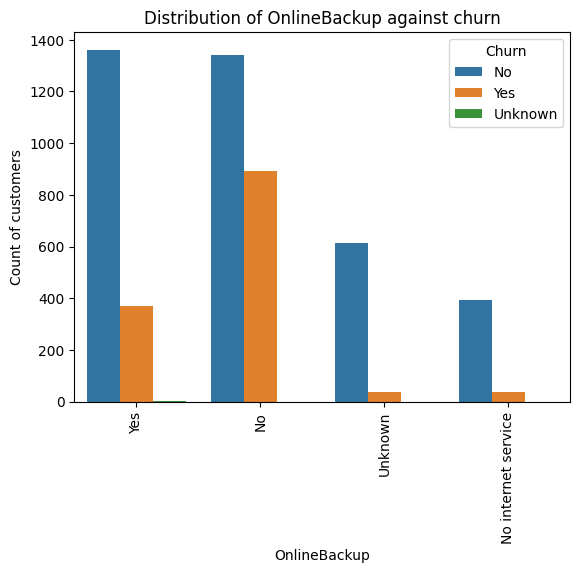

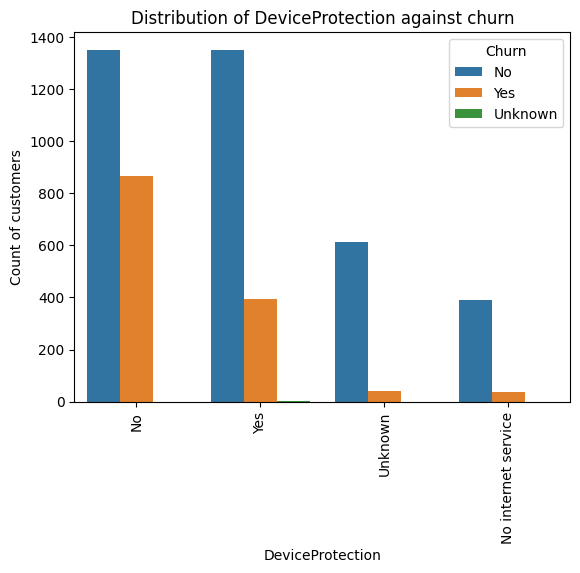

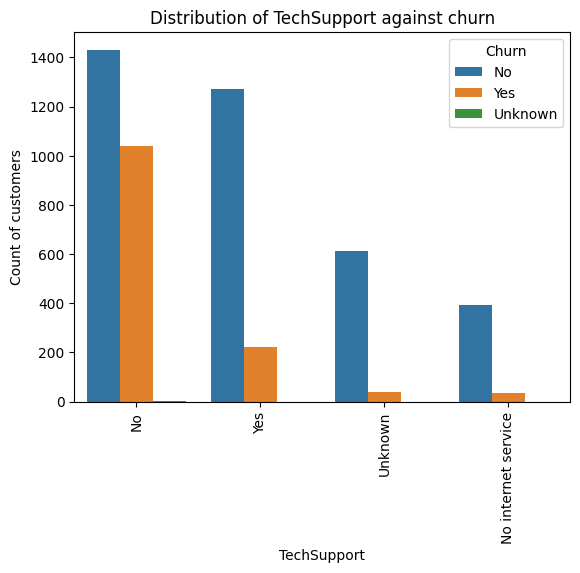

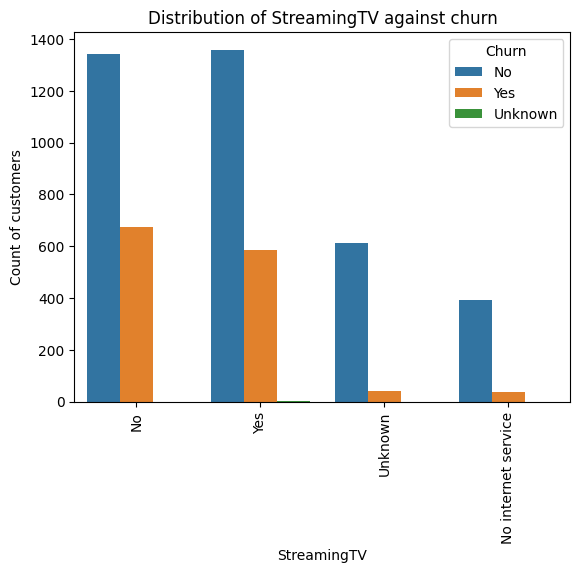

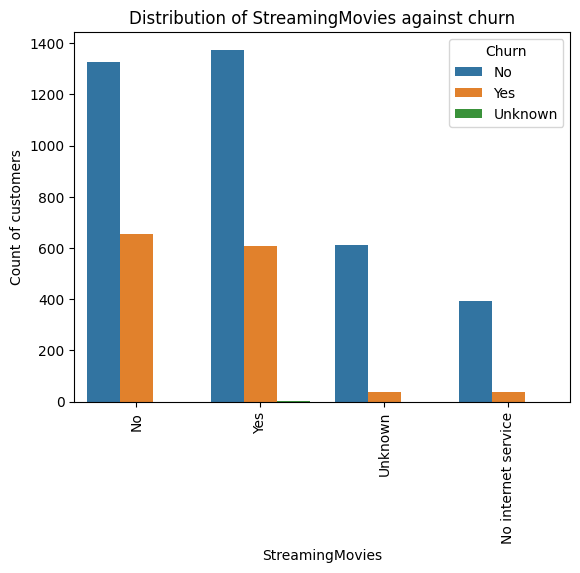

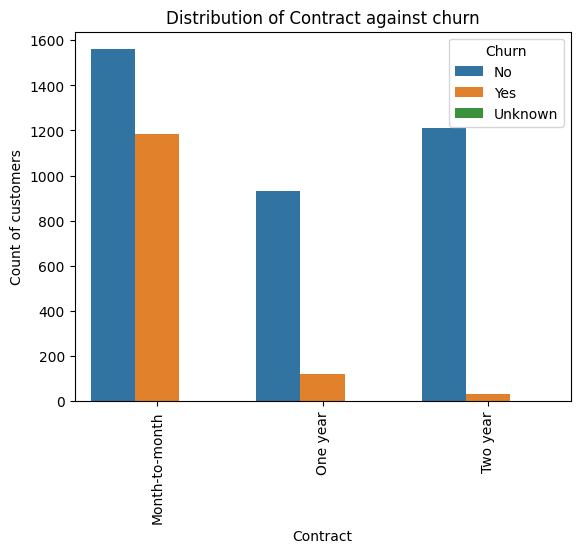

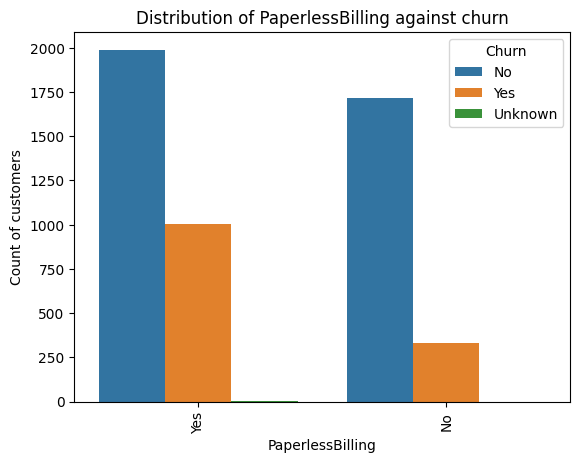

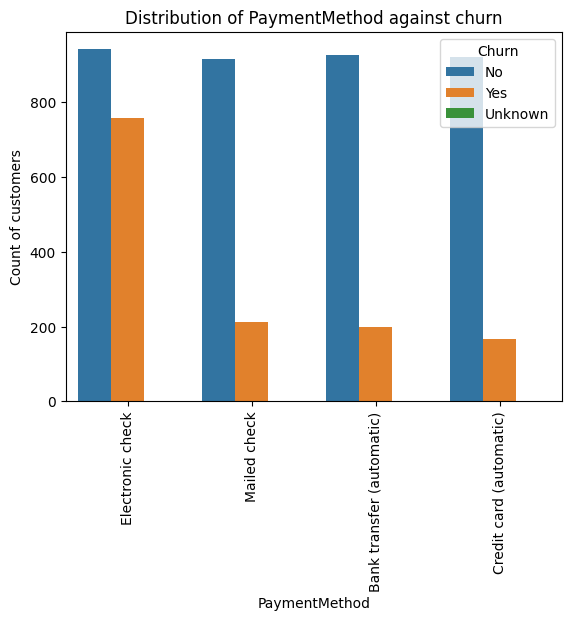

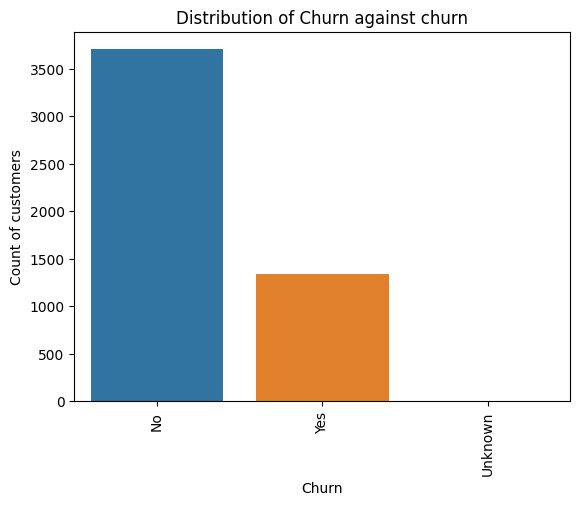

In [29]:
# Distribution of categorical variables columns in train data set against churn
for i, predictor in enumerate(train_data.drop(columns=['TotalCharges', 'MonthlyCharges', 'customerID', 'tenure']).columns):
    plt.figure(i)
    sns.countplot(data=train_data, x=predictor, hue='Churn')
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {predictor} against churn')
    plt.xlabel(f'{predictor}')
    plt.ylabel('Count of customers')
    plt.show()

**The key insights from the univariate analysis of the numerical variables in the train data set are as follows**


- Tenure:
  - Customers typically stay for an average of 32.5 months, with a wide range up to 72 months. There's a strong positive correlation (0.825) between tenure and total charges, indicating that longer-tenured customers tend to incur higher total costs. However, being a senior citizen shows a negligible correlation (0.0046) with tenure, suggesting little influence on how long customers stay.

- Monthly Charges:
  - The average monthly charge is $65.09, ranging from $18.40 to $118.80. There's a moderate positive correlation between monthly charges and both tenure (0.241) and total charges (0.647). This implies that customers with longer tenure and higher monthly charges also accumulate higher total charges over time. Senior citizens tend to have slightly higher monthly charges (correlation of 0.222).

- Total Charges:
  - The average total charge over the customer lifetime is $2302.06, ranging widely from $18.80 to $8684.80. Total charges exhibit strong positive correlations with both tenure (0.825) and monthly charges (0.647), indicating that as tenure and monthly costs increase, so does the total expenditure. Senior citizenship has a minimal impact on total charges (correlation of 0.095), suggesting it plays a minor role in overall expenditure patterns.




**Mulitivariate Analysis**

(array([0, 1, 2]),
 [Text(0, 0, 'No'), Text(1, 0, 'Unknown'), Text(2, 0, 'Yes')])

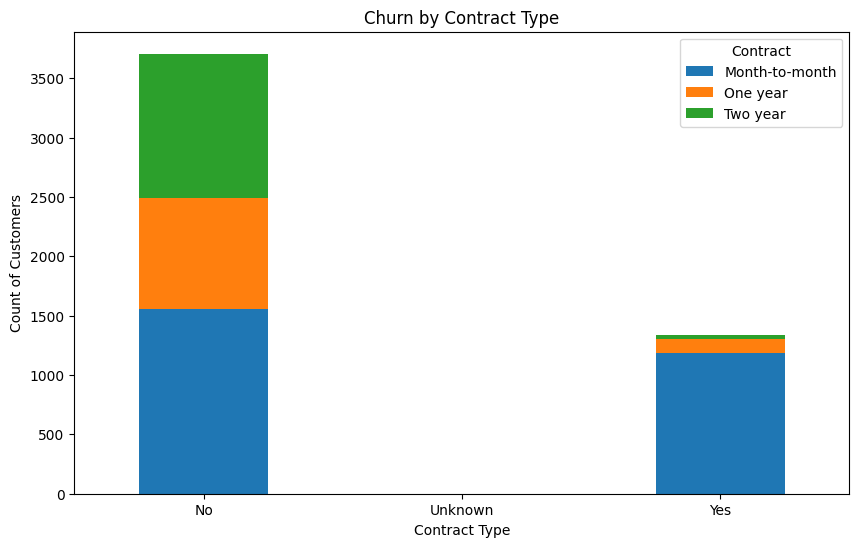

In [30]:
#Comparing multivariate analysis in code 

train_data.groupby(['Churn', 'Contract'])['Contract'].count().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count of Customers')
plt.xticks(rotation=0)


#### Key insights from the multivariate analysis of the numerical variables: 
- Month-to-month contracts have a higher churn rate compared to One year and Two year contracts. This suggests that customers with longer-term commitments are less likely to churn.
- The significant difference in churn between contract types could imply that offering incentives for longer contracts might reduce churn rates

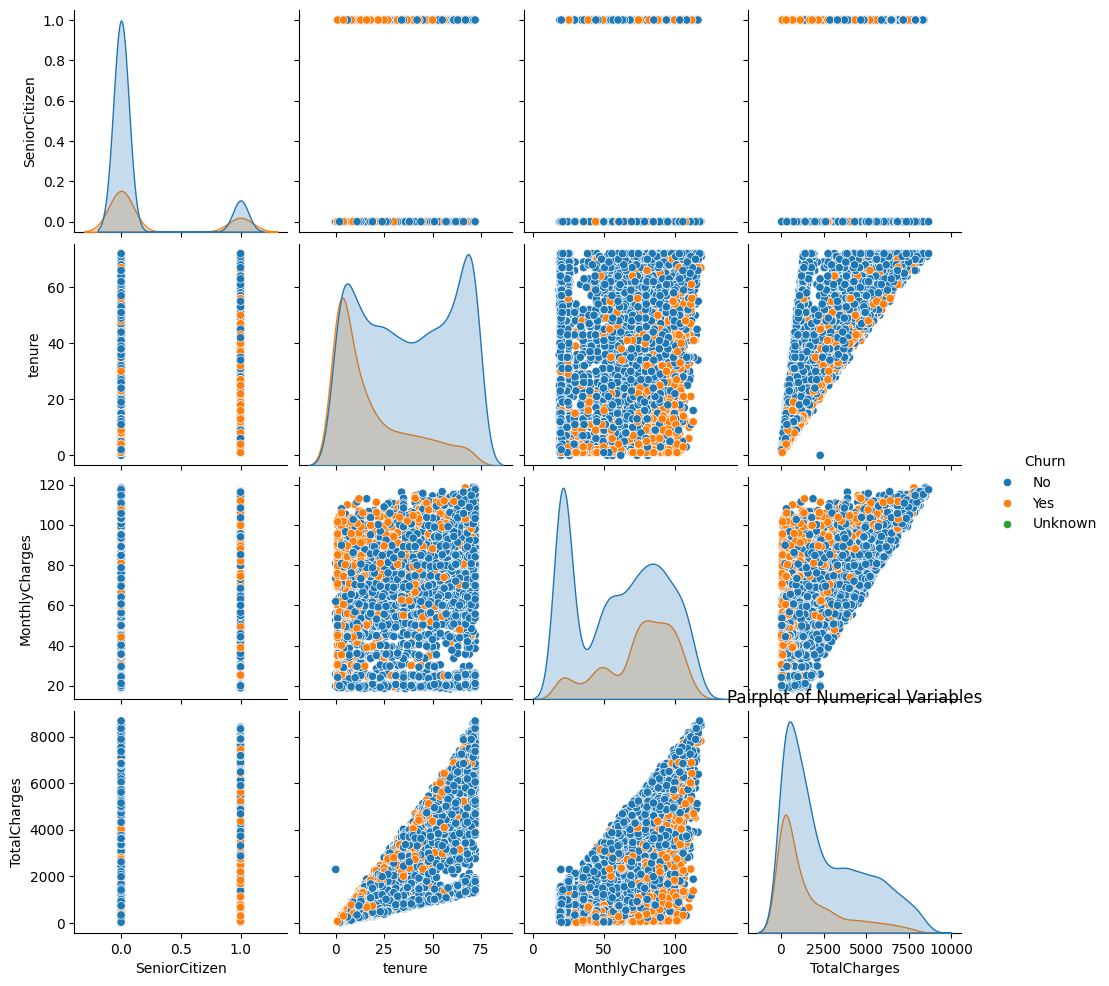

In [31]:
#using pairplot for multivariate analysis

sns.pairplot(train_data, hue='Churn')
plt.title('Pairplot of Numerical Variables')
plt.show()

##### Additional insights from the multivariate analysis of the numerical variables

- Tenure vs. MonthlyCharges: Churners tend to have lower tenure and higher monthly charges.

- Tenure vs. TotalCharges: Churners are concentrated at lower tenures and therefore have lower TotalCharges.

- MonthlyCharges vs. TotalCharges: As TotalCharges increases with MonthlyCharges, customers with high monthly charges tend to have higher TotalCharges, but are more likely to churn.

### Answering Analytical Questions 

#### What are the key demographic and behavioral characteristics of customers who churn compared to those who stay?


Summary statistics for numerical columns grouped by churn:
       tenure                                                     \
        count       mean        std  min   25%   50%   75%   max   
Churn                                                              
0      3707.0  37.742919  24.043763  0.0  15.0  38.0  61.0  72.0   
1      1336.0  18.241766  19.696326  1.0   2.0  10.0  30.0  72.0   

      MonthlyCharges             ...                     TotalCharges  \
               count       mean  ...     75%         max        count   
Churn                            ...                                    
0             3707.0  61.442690  ...  88.725  118.650002       3707.0   
1             1336.0  75.211003  ...  94.500  118.350000       1336.0   

                                                                     \
              mean          std        min         25%          50%   
Churn                                                                 
0      2567.151000  2

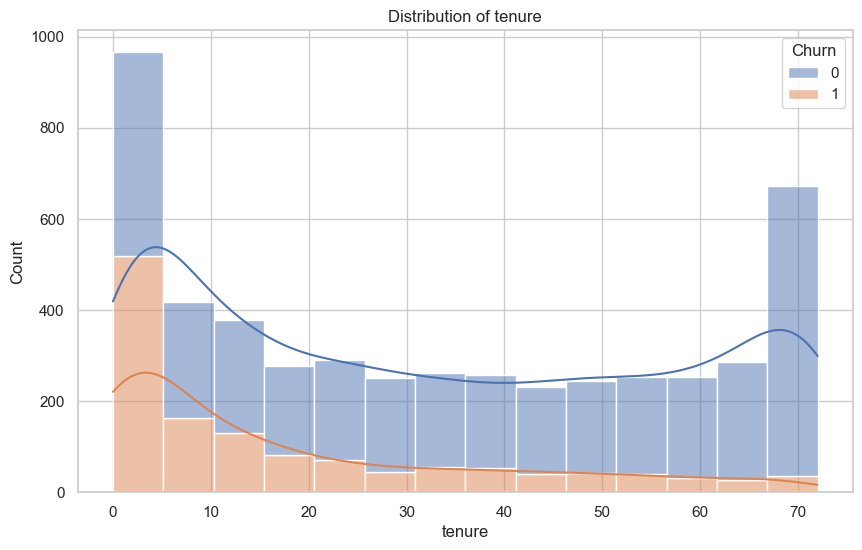

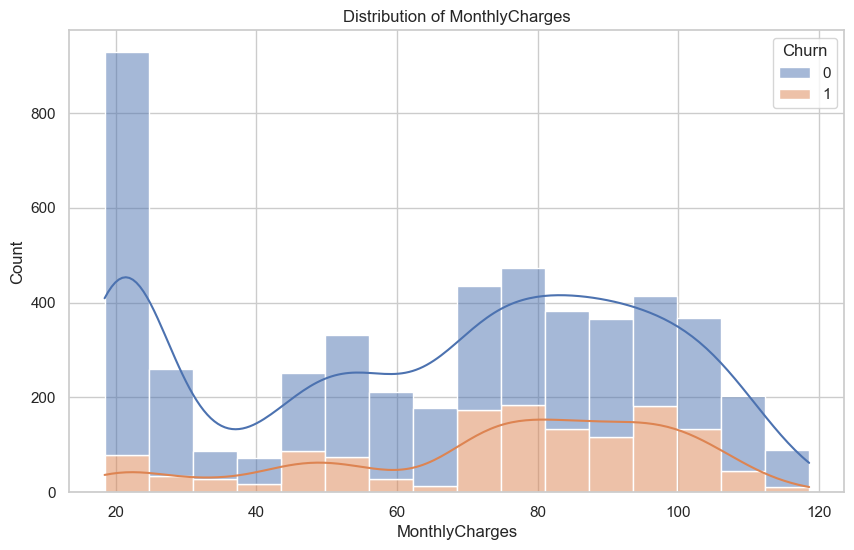

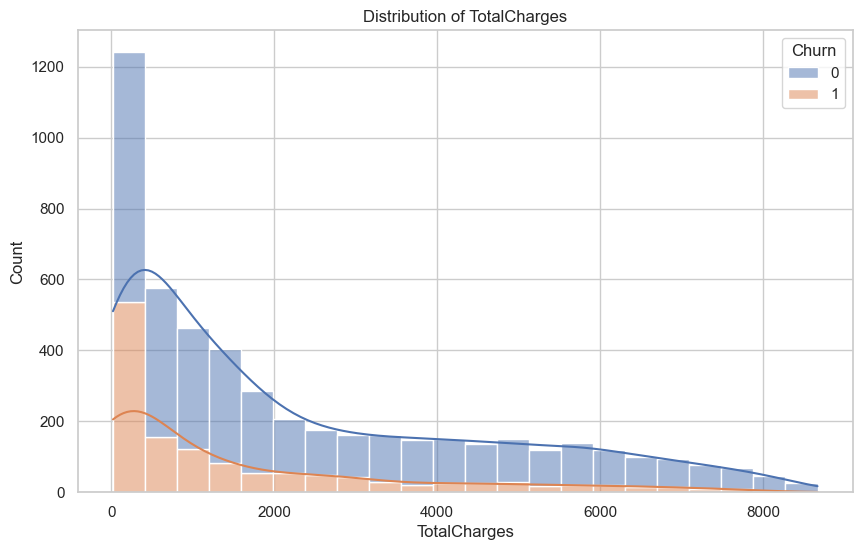

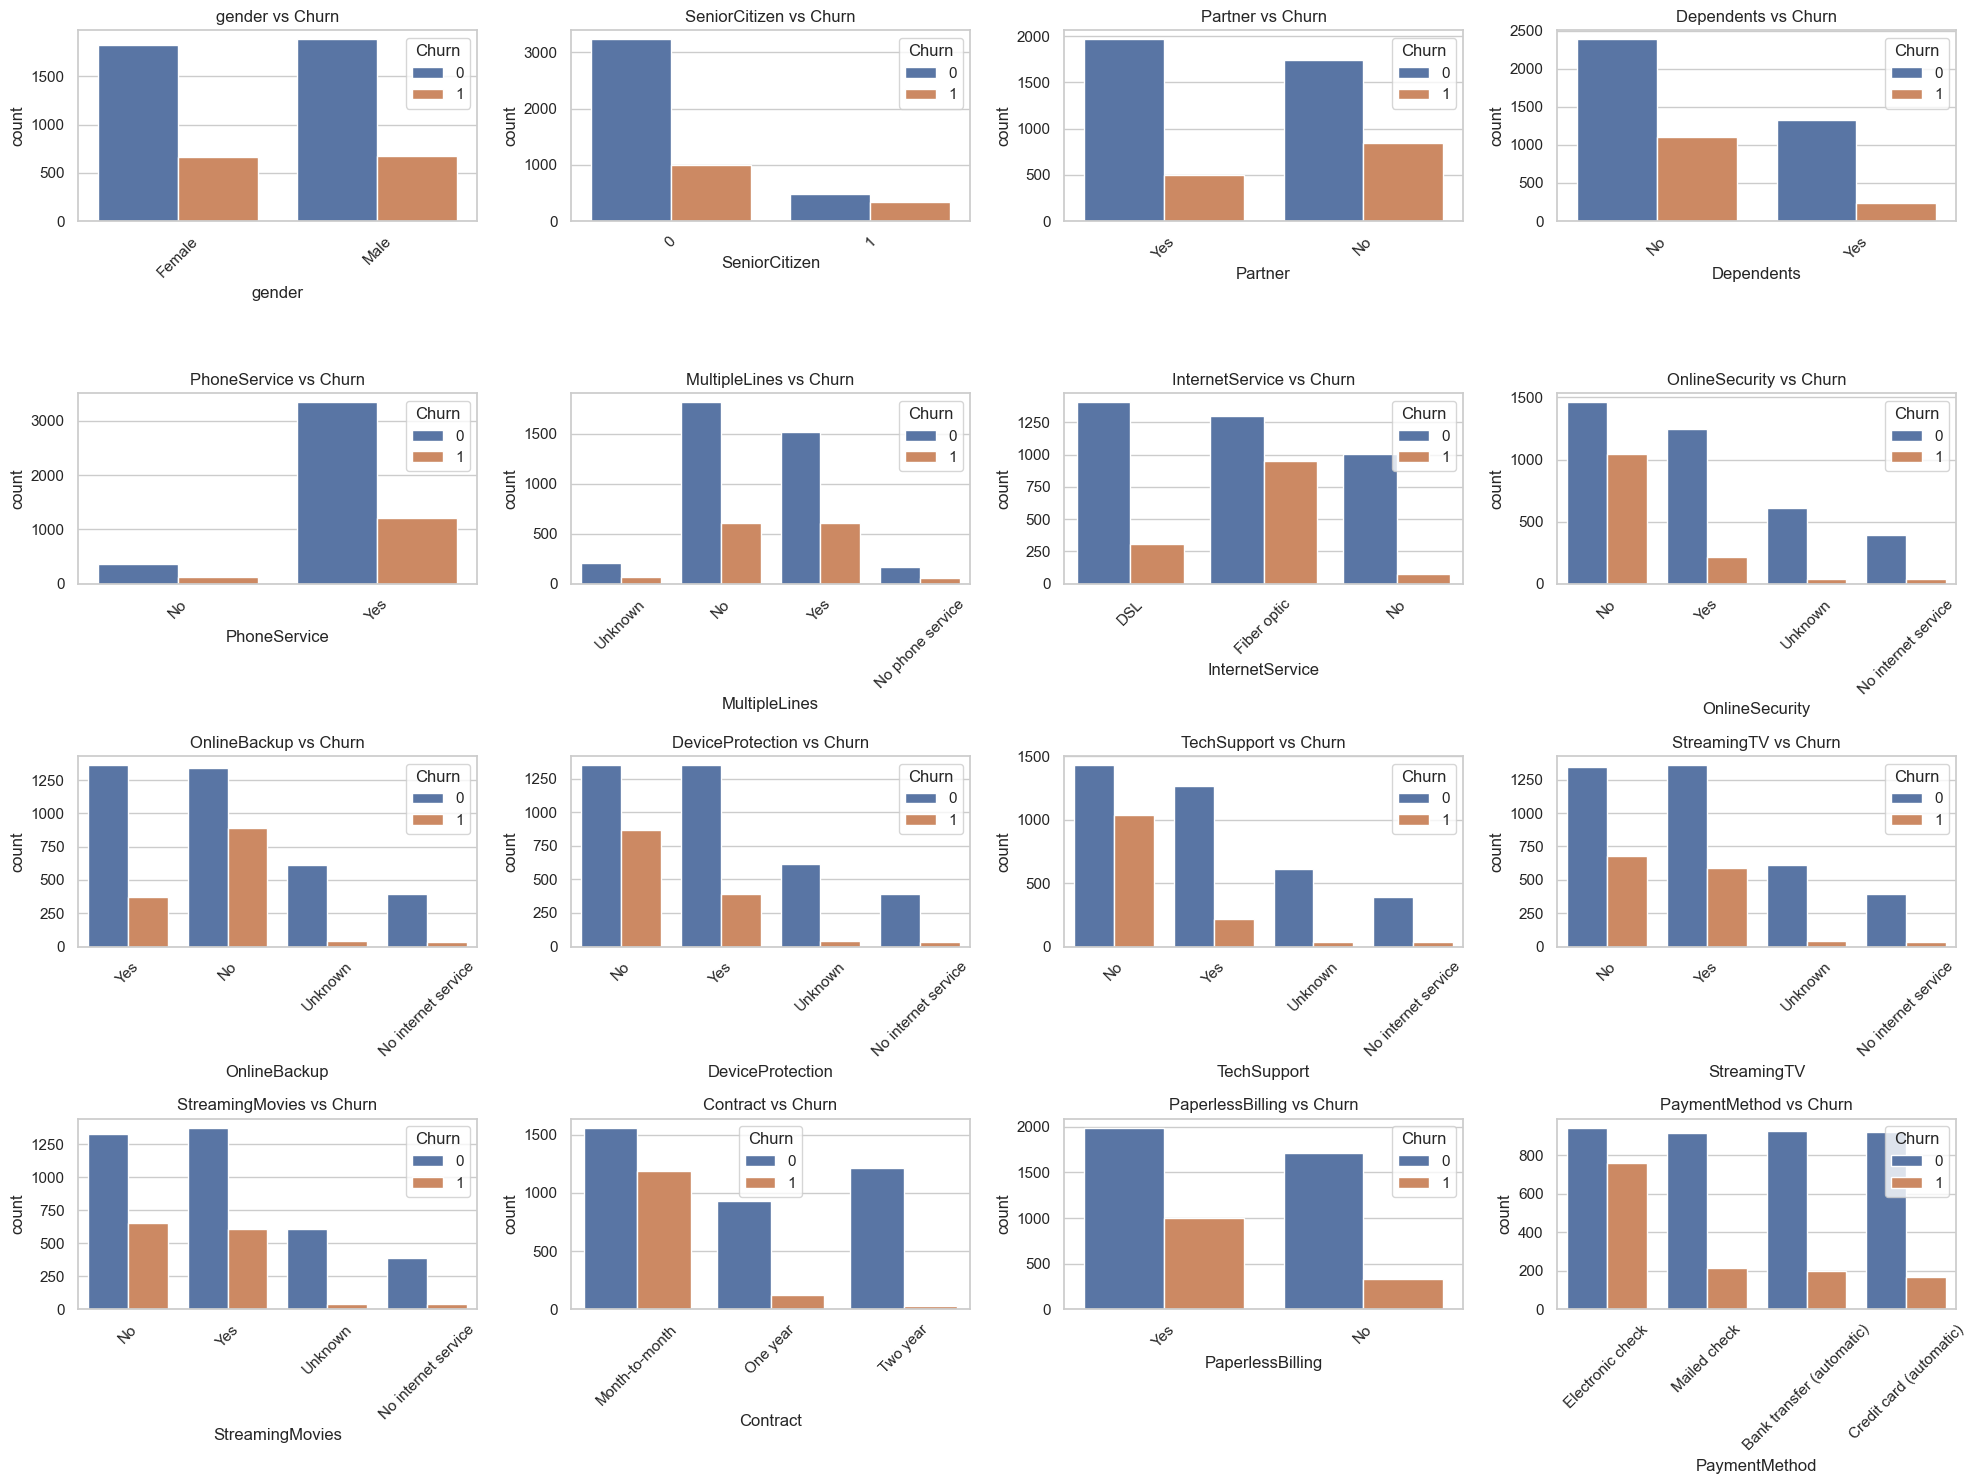


Churn rate by gender:
   gender     Churn
0  Female  0.266103
1    Male  0.263775

Churn rate by SeniorCitizen:
   SeniorCitizen     Churn
1              1  0.415140
0              0  0.235795

Churn rate by Partner:
  Partner     Churn
0      No  0.325725
1     Yes  0.200976

Churn rate by Dependents:
  Dependents     Churn
0         No  0.315623
1        Yes  0.151826

Churn rate by PhoneService:
  PhoneService     Churn
1          Yes  0.267018
0           No  0.245399

Churn rate by MultipleLines:
      MultipleLines     Churn
3               Yes  0.285915
0                No  0.250413
1  No phone service  0.250000
2           Unknown  0.241636

Churn rate by InternetService:
  InternetService     Churn
1     Fiber optic  0.423043
0             DSL  0.180175
2              No  0.070370

Churn rate by OnlineSecurity:
        OnlineSecurity     Churn
0                   No  0.417232
3                  Yes  0.146978
1  No internet service  0.086247
2              Unknown  0.059908

C

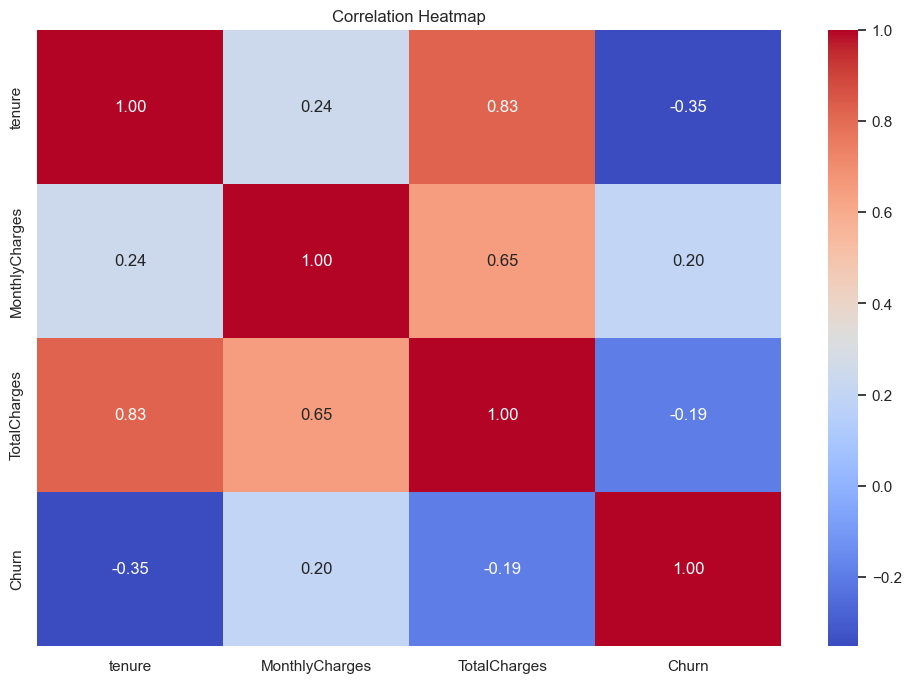

In [32]:
# Convert 'Churn' to numeric
train_data['Churn'] = train_data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# List of numerical columns to analyze
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# List of categorical columns to analyze
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

# Summary statistics for numerical columns grouped by churn
print("Summary statistics for numerical columns grouped by churn:")
print(train_data.groupby('Churn')[numerical_cols].describe())

# Visualization setup
sns.set(style="whitegrid")

# Plot distribution of numerical features for churners and non-churners
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=train_data, x=col, hue='Churn', multiple='stack', kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Count plots for categorical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=train_data, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate churn rates for each category in categorical features
for col in categorical_cols:
    churn_rate = train_data.groupby(col)['Churn'].mean().reset_index().sort_values(by='Churn', ascending=False)
    print(f"\nChurn rate by {col}:")
    print(churn_rate)

# Correlation heatmap to understand correlations between numerical features and churn
plt.figure(figsize=(12, 8))
corr = train_data[numerical_cols + ['Churn']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


2.	Is there a relationship between the payment methods used by customers and their likelihood to churn?


Churn rate by payment method:
               PaymentMethod     Churn
2           Electronic check  0.445882
3               Mailed check  0.187943
0  Bank transfer (automatic)  0.176000
1    Credit card (automatic)  0.154128


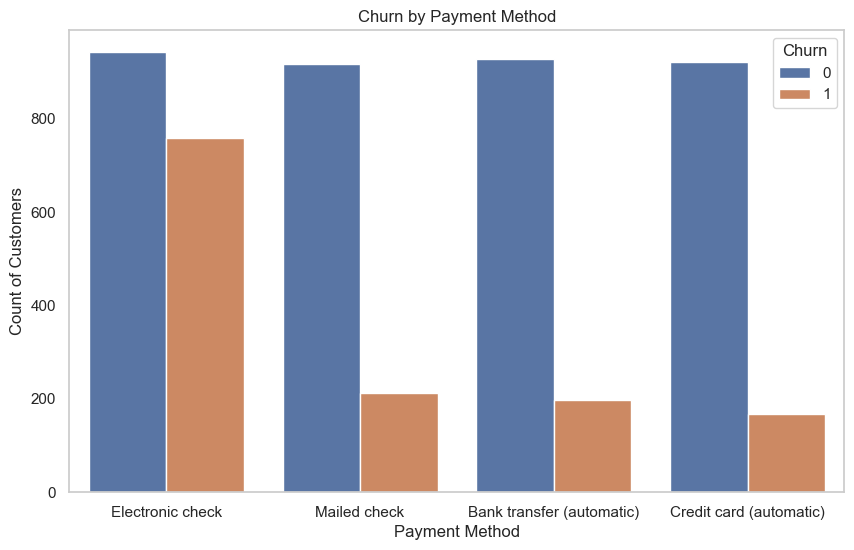

In [36]:
# Churn rate by payment method
churn_rate = train_data.groupby('PaymentMethod')['Churn'].mean().reset_index().sort_values(by='Churn', ascending=False)
print("\nChurn rate by payment method:")
print(churn_rate)

# Visualization setup
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='PaymentMethod', hue='Churn')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count of Customers')
plt.grid(False)  # Turn off grid lines
plt.show()


3 Is there a difference in customer churn based on the type of internet service they use compared to other factors?


Churn rate by internet service:
  InternetService     Churn
1     Fiber optic  0.423043
0             DSL  0.180175
2              No  0.070370


Text(0, 0.5, 'Count of Customers')

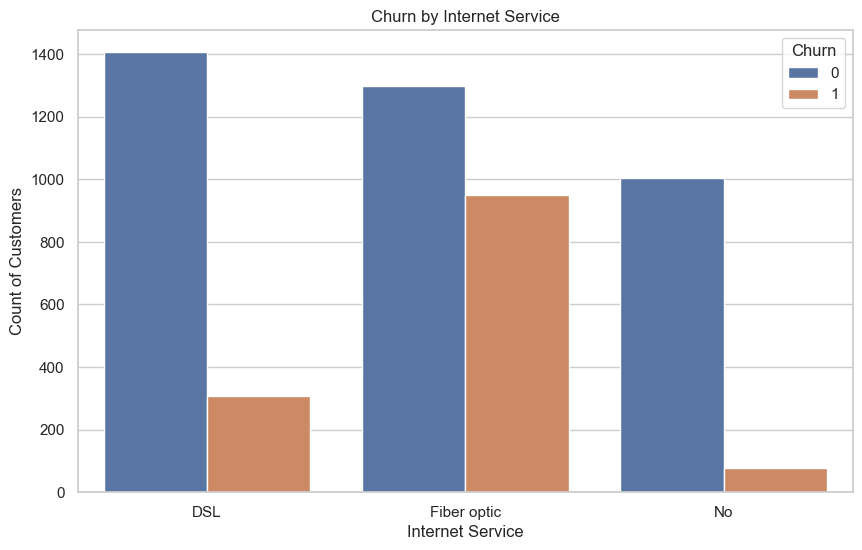

In [40]:
#Is there a difference in customer churn based on the type of internet service they use compared to other factors

# Churn rate by internet service

churn_rate = train_data.groupby('InternetService')['Churn'].mean().reset_index().sort_values(by='Churn', ascending=False)
print("\nChurn rate by internet service:")
print(churn_rate)

# Visualization setup   

plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='InternetService', hue='Churn')
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count of Customers')


Churn rate by internet service:
  InternetService     Churn
1     Fiber optic  0.423043
0             DSL  0.180175
2              No  0.070370


C:\Users\USER\AppData\Local\Temp\ipykernel_17512\3739511046.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train_data, x='InternetService', y='Churn', ci=None, palette='viridis')
C:\Users\USER\AppData\Local\Temp\ipykernel_17512\3739511046.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_data, x='InternetService', y='Churn', ci=None, palette='viridis')


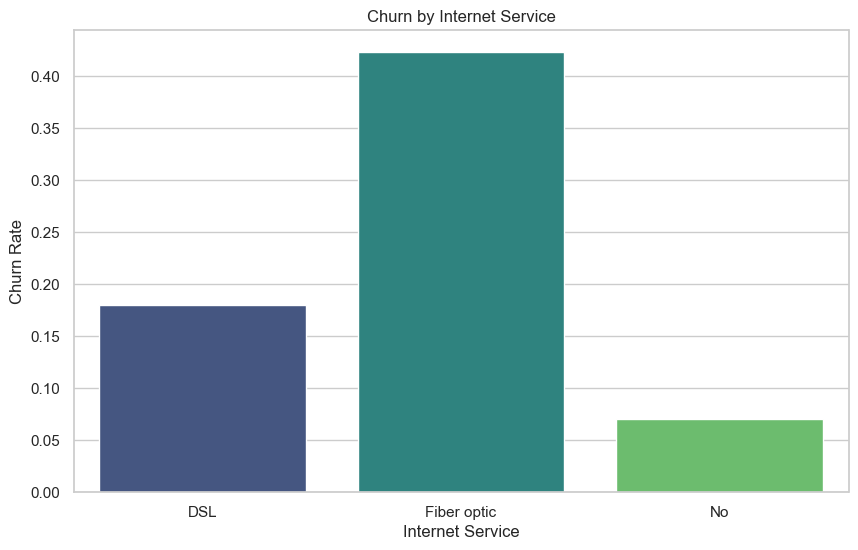

In [42]:
# Churn rate by internet service
churn_rate = train_data.groupby('InternetService')['Churn'].mean().reset_index().sort_values(by='Churn', ascending=False)
print("\nChurn rate by internet service:")
print(churn_rate)

# Visualization setup
plt.figure(figsize=(10, 6))
sns.barplot(data=train_data, x='InternetService', y='Churn', ci=None, palette='viridis')
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Churn Rate')
plt.show()



Churn rate by internet service:
  InternetService     Churn
1     Fiber optic  0.423043
0             DSL  0.180175
2              No  0.070370


C:\Users\USER\AppData\Local\Temp\ipykernel_17512\3078298313.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train_data, x='InternetService', y='Churn', ci=None, palette='viridis')
C:\Users\USER\AppData\Local\Temp\ipykernel_17512\3078298313.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_data, x='InternetService', y='Churn', ci=None, palette='viridis')


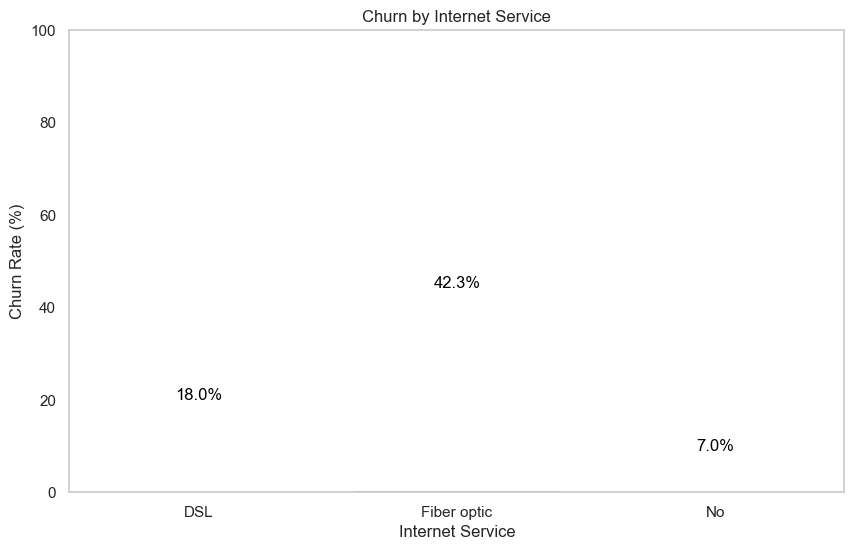

In [43]:
# Churn rate by internet service
churn_rate = train_data.groupby('InternetService')['Churn'].mean().reset_index().sort_values(by='Churn', ascending=False)
print("\nChurn rate by internet service:")
print(churn_rate)

# Calculate percentages for annotation
total_customers = len(train_data)
churn_percentage = train_data.groupby('InternetService')['Churn'].mean() * 100

# Visualization setup
plt.figure(figsize=(10, 6))
sns.barplot(data=train_data, x='InternetService', y='Churn', ci=None, palette='viridis')
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Churn Rate (%)')
plt.grid(False)  # Remove grid lines
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100 for percentages

# Add percentages above each bar
for index, row in churn_rate.iterrows():
    plt.text(index, row['Churn'] * 100 + 2, f'{row["Churn"] * 100:.1f}%', ha='center', color='black')

plt.show()



4 What is the proportion of cusotmers who have churned to those who have not?

C:\Users\USER\AppData\Local\Temp\ipykernel_17512\998398108.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')


Text(0, 0.5, 'Percentage of Customers')

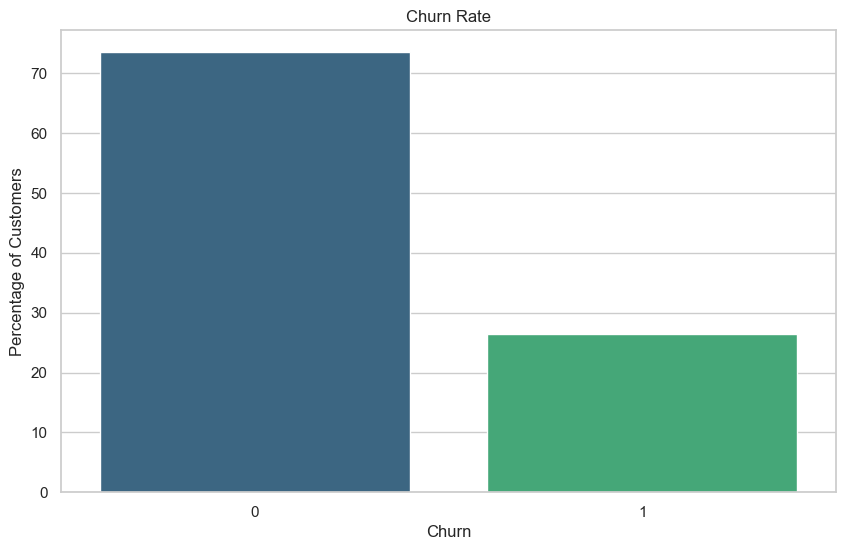

In [44]:
#what is the proportion of cusotmers who have churned to those who have not?

churn_rate = train_data['Churn'].value_counts(normalize=True) * 100

# Visualization setup

plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')
plt.title('Churn Rate')
plt.xlabel('Churn')
plt.ylabel('Percentage of Customers')


5. How does the length of time a customer has been with the company (tenure) impact their likelihood of churning? Are newer customers more likely to churn than long-term customers?"

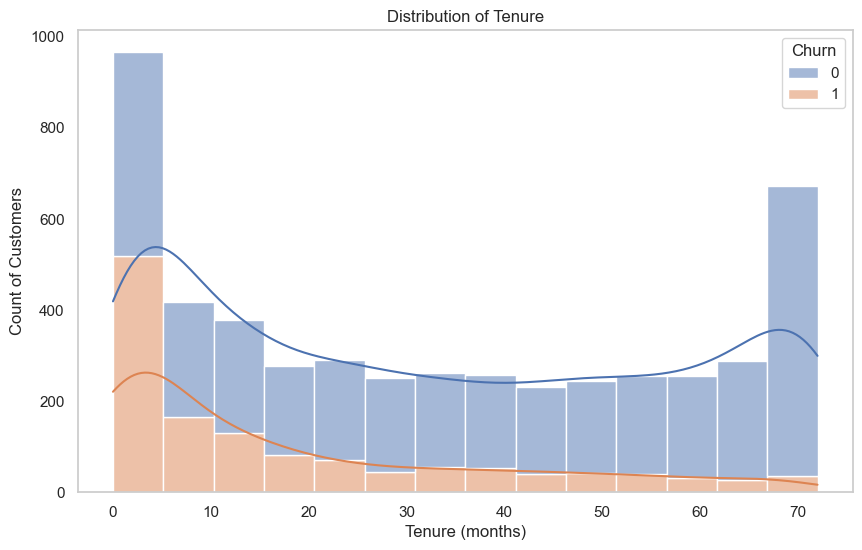

In [46]:
#how does the lenghth of time a cutomer beeen with t he company 

plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='tenure', hue='Churn', multiple='stack', kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Count of Customers')
plt.grid(False)  # Turn off grid lines
plt.show()




6. What is the relationship between monthly charges and total charges?

Text(0, 0.5, 'Total Charges')

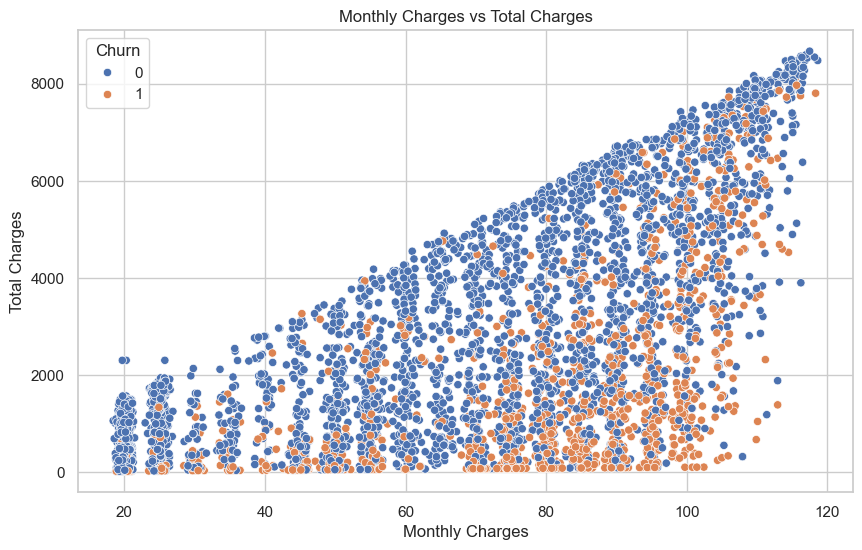

In [47]:
#what is the relationship between monthly charges and total charges?

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='MonthlyCharges', y='TotalCharges', hue='Churn')
plt.title('Monthly Charges vs Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')


**Hypothsis Testing**

- Null Hypothesis (Ho): There is a significant difference in churn rates between customers who have received promotional offers.

- ALternate (Ha) : There is no significant difference in churn rates between customers who have recieved promotional offers